# Assignment 1

## Introduction 
In this assignment we worked with several different data sets and visualisations and looked for possible co relations between the data.

## Method
First we imported some packages we needed to create the data frames and plots. We also downloaded data from https://ourworldindata.org/ 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Import datasets
df_gdp = pd.read_csv('GDP-2015.csv')
df_le = pd.read_csv('life-expectancy.csv')
df_alcohol = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
df_satisfaction = pd.read_csv('happiness-cantril-ladder.csv')
df_gdp2 = pd.read_csv('gross-domestic-product.csv')
df_HDIvsCOR = pd.read_csv('human-development-index-vs-corruption-perception-index.csv')

## Data cleaning
First off we renamed the 'Entity' column in each data set to 'Country' and simplified the names of several other columns, this was done to have more descriptive and easier to read names. Then we dropped the 'Code' columns as 'Country' was enough to describe the origin of the data. As the set 'life-expectancy' has data for several years and 'GDP-2015' only contained data for 2015 we tried to remove all other years except 2015 from 'life-expectancy'. Later we realized this was unnecessary as the merge-function by default uses an inner-join and automatically only returned the corresponding values.

In [62]:
# Renaming and dropping unnecessary columns
df_gdp = df_gdp.rename(columns = {'Entity' : 'Country'})
df_gdp = df_gdp.drop(columns = ['Code'])

df_le = df_le.rename(columns = {'Entity' : 'Country', 'Life expectancy (years)' : 'Life expectancy'})
df_le = df_le.drop(columns = ['Code'])

df_alcohol = df_alcohol.rename(columns = {'Entity' : 'Country', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' : 'Total alcohol consumption per capita'})
df_alcohol = df_alcohol.drop(columns = ['Code'])
df_alcohol['Year'] = 2016

df_satisfaction = df_satisfaction.rename(columns = {'Entity' : 'Country', 'Life satisfaction in Cantril Ladder (World Happiness Report 2019)' : 'Life satisfaction'})
df_satisfaction = df_satisfaction.drop(columns = ['Code'])

df_gdp2 = df_gdp2.rename(columns = {'Entity' : 'Country', 'GDP (constant 2010 US$)' : 'GDP'})
df_gdp2 = df_gdp2.drop(columns = ['Code'])
df_gdp2 = df_gdp2[df_gdp2['Year'] == 2015]

df_HDIvsCOR = df_HDIvsCOR.rename(columns = {'Entity' : 'Country'})
df_HDIvsCOR = df_HDIvsCOR.drop(columns = ['Code'])
df_HDIvsCOR = df_HDIvsCOR.drop(columns = ['Continent'])
df_HDIvsCOR = df_HDIvsCOR.drop(columns = ['Total population (Gapminder, HYDE & UN)'])
df_HDIvsCOR = df_HDIvsCOR[df_HDIvsCOR['Year'] == 2015]





## Merging data
We then merged our data so that that all the rows corelating rows of the merged data frames matched eath other. By doing this we also removed regions and only looked at countries. The countries were chosen by a given data frame.

In [80]:
# Merge and rework data
df_2015 = pd.merge(df_gdp, df_le)
df_2015["GDP per capita"] = np.log10(df_2015["GDP per capita"])

df_alcsat = pd.merge(df_alcohol, df_satisfaction)

df_2015_2 = pd.merge(df_gdp2, df_le)
df_2015_2["GDP"] = np.log10(df_2015_2["GDP"])

df_HDIvsCOR_2015 = pd.merge(df_2015,df_HDIvsCOR)
df_HDIvsCOR_2015 = df_HDIvsCOR_2015.drop(columns = ['GDP per capita'])
df_HDIvsCOR_2015 = df_HDIvsCOR_2015.drop(columns = ['Life expectancy'])





## Life expectancy vs GDP per capita
First we looked at life expectancy vs GDP per capita. We then plotted the data and found that there was a linear co relation- This is reasonable because if a country has higher GDP per capita they probably have a higher standard of life in aspects such as healthcare, employment etc. These factors are all contributing to a longer life expectancy for the population. 

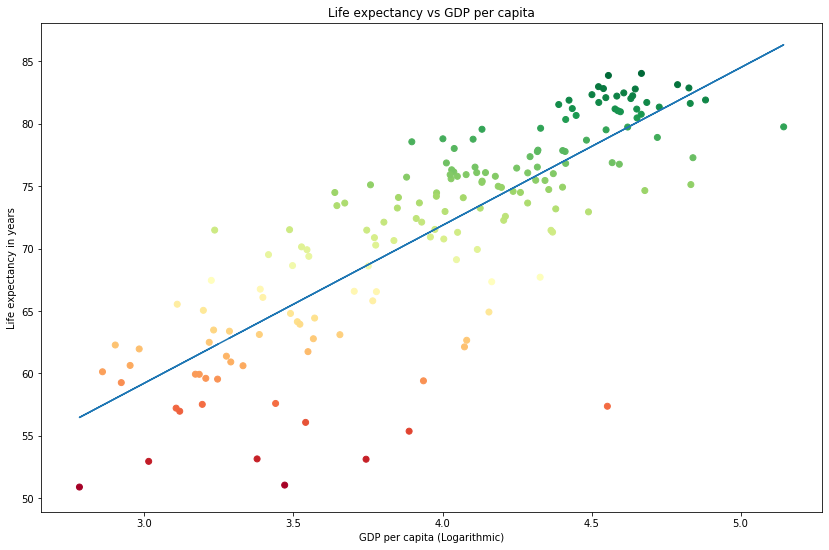

In [81]:
# Map data to x, y values and create regression line
x = df_2015["GDP per capita"]
y = df_2015["Life expectancy"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_2015["Life expectancy"], cmap="RdYlGn")

# Create title and labels
plt.title('Life expectancy vs GDP per capita')
plt.xlabel('GDP per capita (Logarithmic)')
plt.ylabel('Life expectancy in years')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()

## Mean and STD
By calculating the mean and standard deviation for our set about life expectancy we were able to return a list only containing the countries that had a higher life expectancy than one standard deviation above the mean. We then produced a set consisting of all countries with a GDP per capita less than the mean. From this set we could then return another set with the countries with a GDP per capita less than the mean and a life expectancy of one standard deviation above the mean.

In [87]:
# Mean and STD
df_mean_le = df_2015["Life expectancy"].mean()
df_std_le = df_2015["Life expectancy"].std()
df_highlife = (df_2015[df_2015["Life expectancy"] > (df_mean_le + df_std_le)])

print("The mean life expectancy of all countries is " , df_mean_le)
print("The standard deviation is ",df_std_le)
print(df_highlife)

The mean life expectancy of all countries is  71.88696385542171
The standard deviation is  8.123825402008713
            Country  Year  GDP per capita  Life expectancy
6         Australia  2015        4.646757           82.794
7           Austria  2015        4.651714           81.182
13          Belgium  2015        4.596938           80.969
24           Canada  2015        4.631890           82.026
37           Cyprus  2015        4.413350           80.350
40          Denmark  2015        4.652623           80.475
50          Finland  2015        4.578868           81.196
51           France  2015        4.584874           82.224
55          Germany  2015        4.666761           80.770
57           Greece  2015        4.389963           81.548
63        Hong Kong  2015        4.667490           84.043
65          Iceland  2015        4.608226           82.481
70          Ireland  2015        4.727313           81.344
71           Israel  2015        4.501456           82.340
72    

## Low GDP and high life expectancy
Next we looked at which countries have  high life expectancy but also have a low GDP

In [16]:
# Low GDP high Life expectancy
df_mean_gdp = df_2015["GDP per capita"].mean()
df_std_gdp = df_2015["GDP per capita"].std()
df_lowgdp = (df_2015[df_2015["GDP per capita"] < (df_mean_gdp)])

df_lowhigh = (df_lowgdp[df_lowgdp["Life expectancy"] > (df_mean_le)])
print(df_lowhigh)

         Country  Year  GDP per capita  Life expectancy
5        Armenia  2015        3.980094           74.467
11      Barbados  2015        4.001301           78.801
25    Cape Verde  2015        3.803321           72.117
36          Cuba  2015        3.897022           78.561
42      Dominica  2015        3.979412           74.194
46   El Salvador  2015        3.911850           72.412
58     Guatemala  2015        3.848497           73.250
62      Honduras  2015        3.638689           74.495
73       Jamaica  2015        3.852175           74.098
85         Libya  2015        3.930134           72.121
100      Morocco  2015        3.879497           75.726
107    Nicaragua  2015        3.672005           73.649
114    Palestine  2015        3.645619           73.442
116     Paraguay  2015        3.922414           73.662
162      Vietnam  2015        3.758382           75.110


## Life expectancy vs GDP
To compare GDP and GDP per capita's effect on life expectancy we created a second scatter plot with gross domestic product instead of GDP per capita. This second plot did not show a correlation as clear as out first. This seems reasonable as gross domestic product does not specify individual wealth and therefore isn't as correlated with life expectancy. Using GDP per capita as an indicator of a strong economy shows how strong a nations economy is in relation to it's population size. However it does not show a country's absolute economic strength in comparison with other nations.

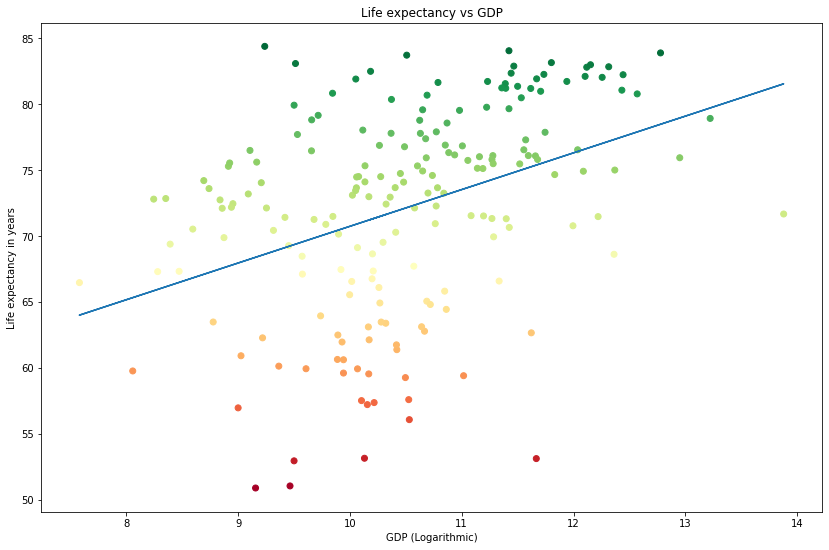

In [88]:
# Map data to x, y values and create regression line
x = df_2015_2["GDP"]
y = df_2015_2["Life expectancy"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_2015_2["Life expectancy"], cmap="RdYlGn")

# Create title and labels
plt.title('Life expectancy vs GDP')
plt.xlabel('GDP (Logarithmic)')
plt.ylabel('Life expectancy in years')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()

## Total alcohol consumption vs life satisfaction
We chose to explore the connection between life satisfaction and alcohol consumption. We found this to be especially interesting as both a negative and positive outlook on life can correlate to more drinking. Although we expected to see the plot leaning towards low life expectation and high alcohol consumption. In reality there wasn't any clear correlation between the two, although there seemed to be few countries that reported low life satisfaction that drank very much and few countries that reported high life satisfaction that drank very little. This could be because countries that report very low life satisfaction could be very affected by war or poverty and therefore not have the means for buying and consuming alcohol. 

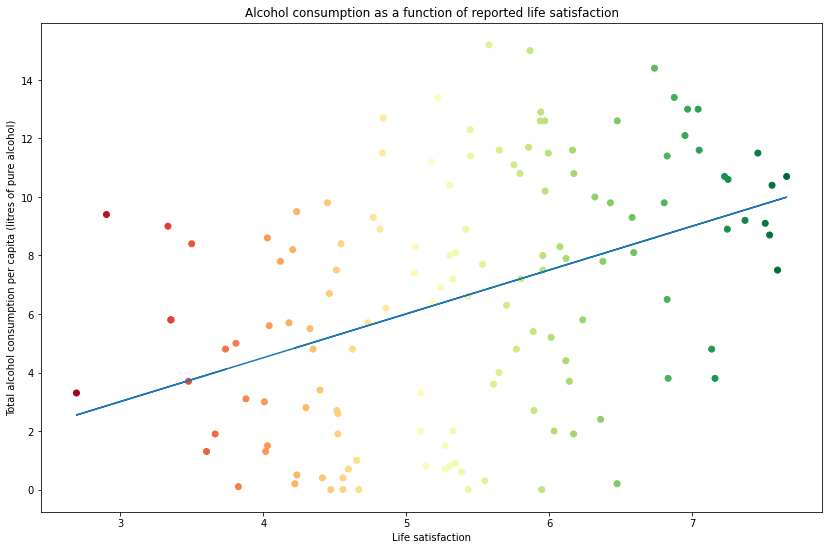

In [18]:
# Map data to x, y values and create regression line
x = df_alcsat["Life satisfaction"]
y = df_alcsat["Total alcohol consumption per capita"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_alcsat["Life satisfaction"], cmap="RdYlGn")

# Create title and labels
plt.title('Alcohol consumption vs reported life satisfaction')
plt.xlabel('Life satisfaction')
plt.ylabel('Total alcohol consumption per capita (litres of pure alcohol)')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()

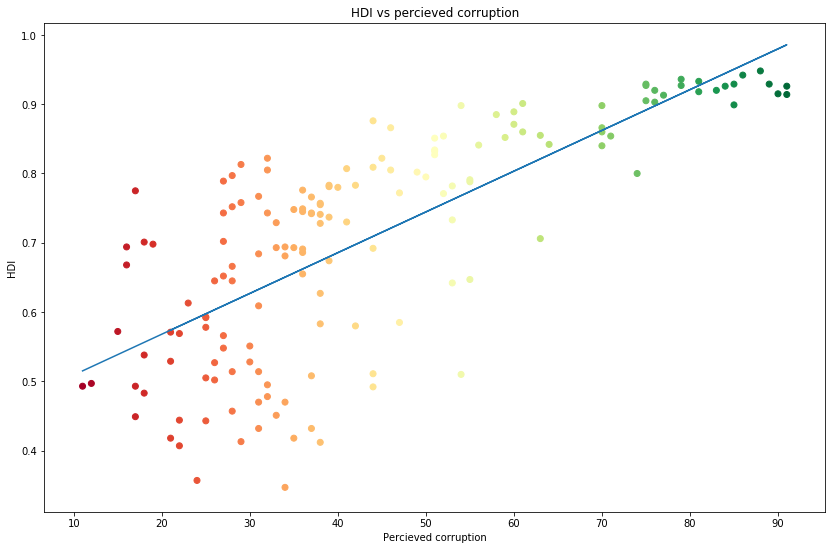

In [78]:
# Map data to x, y values and create regression line
x = df_HDIvsCOR_2015["Corruption Perception Index - Transparency International (2018)"]
y = df_HDIvsCOR_2015["Human Development Index (UNDP)"]

m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_HDIvsCOR_2015["Corruption Perception Index - Transparency International (2018)"], cmap="RdYlGn")

# Create title and labels
plt.title('HDI vs percieved corruption')
plt.xlabel('Percieved corruption')
plt.ylabel('HDI')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()